In [1]:
!pip install pymysql

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False 
%matplotlib inline
import pymysql


In [3]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' 
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False 

In [18]:
conn = pymysql.connect(host='localhost', user='root', password='2544',
                      db='persondb', charset='utf8')
cur = conn.cursor()

### 쿼리문 1

In [29]:
sql = 'SELECT age_2, SUM(num) FROM age_tbl GROUP BY age_2'
cur.execute(sql)

9

In [30]:
row = cur.fetchall()

In [31]:
Dataname = ['age', '장애인구수']
result_1 = pd.DataFrame(row, columns=Dataname)
result_1 = result_1.set_index('age')
result_1.head()

,장애인구수
age,
9세미만,309
10~19세,498
20~29세,993
30~39세,1426
40~49세,2386


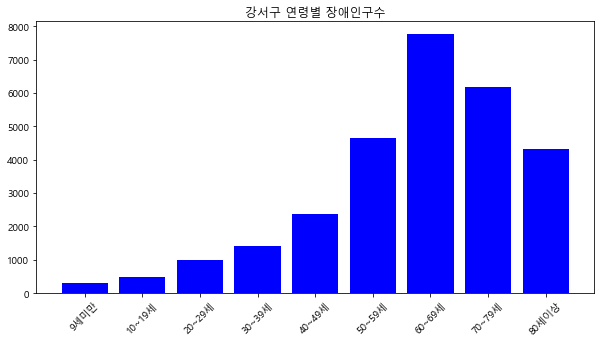

In [37]:
plt.figure(figsize=(10,5))
plt.bar(result_1.index, result_1['장애인구수'], color='blue')
plt.title('강서구 연령별 장애인구수')
plt.xticks(rotation=45)
plt.show()

### 쿼리문 2

In [38]:
sql = 'SELECT type_2, SUM(num) FROM type_tbl GROUP BY type_2'
cur.execute(sql)

3

In [39]:
row = cur.fetchall()

In [41]:
Dataname = ['type', '장애인구수']
result_2 = pd.DataFrame(row, columns=Dataname)
result_2 = result_2.set_index('type')
result_2.head()

,장애인구수
type,
지체,11921
뇌병변,2857
시각,2827


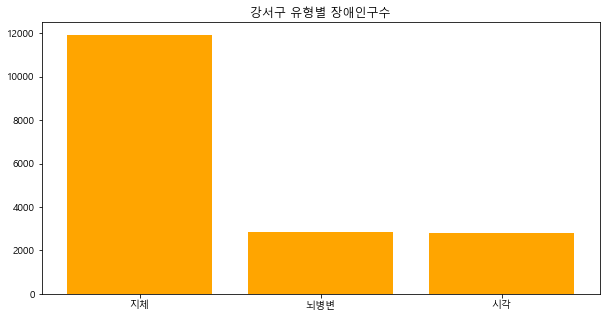

In [43]:
plt.figure(figsize=(10,5))
plt.bar(result_2.index, result_2['장애인구수'], color='orange')
plt.title('강서구 유형별 장애인구수')
plt.show()

### 쿼리문 3

In [22]:
sql = 'SELECT a.dong_3 AS \'동별\', num, total, round(num/total,3) AS \'ratio\' FROM (SELECT dong_3, SUM(num) AS num FROM type_tbl GROUP BY dong_3) a inner join total_tbl b ON a.dong_3 = b.dong_3 ORDER BY ratio DESC'
cur.execute(sql)

20

In [23]:
row = cur.fetchall()

In [24]:
Dataname = ['행정동', '장애인구수', '인구수', '장애인비율']
result_3 = pd.DataFrame(row, columns = Dataname)

In [25]:
result_3.set_index('행정동', inplace=True)
result_3.head()

,장애인구수,인구수,장애인비율
행정동,,,
가양2동,1368,14109,0.097
등촌3동,2203,30714,0.072
가양3동,955,15138,0.063
방화3동,1248,22924,0.054
방화2동,976,23656,0.041


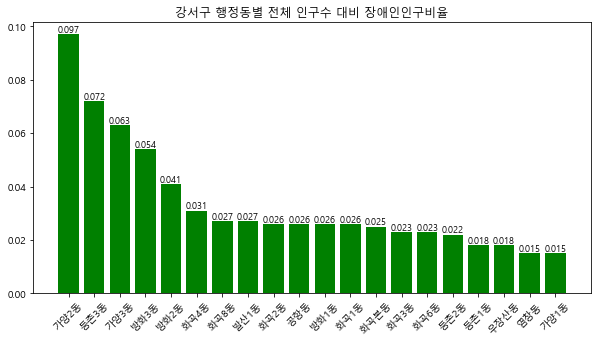

In [32]:
plt.figure(figsize=(10,5))
bar = plt.bar(result_3.index, result_3['장애인비율'], color='green')

for i, v in enumerate(result.index):
    plt.text(v, result_3['장애인비율'][i],result_3['장애인비율'][i],
             fontsize=9,
             horizontalalignment='center',
             verticalalignment='bottom')
plt.title('강서구 행정동별 전체 인구수 대비 장애인인구비율')
plt.xticks(rotation=45)
plt.show()

In [27]:
result_3['장애인비율_정규화'] = (result_3['장애인비율'] - result_3['장애인비율'].min()) / (result_3['장애인비율'].max() - result_3['장애인비율'].min() )
result_3

,장애인구수,인구수,장애인비율,장애인비율_정규화
행정동,,,,
가양2동,1368,14109,0.097,1
등촌3동,2203,30714,0.072,0.6951219512195121951219512195
가양3동,955,15138,0.063,0.5853658536585365853658536585
방화3동,1248,22924,0.054,0.4756097560975609756097560976
방화2동,976,23656,0.041,0.3170731707317073170731707317
화곡4동,639,20820,0.031,0.1951219512195121951219512195
화곡8동,662,24789,0.027,0.1463414634146341463414634146
발산1동,991,36572,0.027,0.1463414634146341463414634146
화곡2동,470,18096,0.026,0.1341463414634146341463414634


In [17]:
result_3.to_csv('강서구_장애인인구수_정규화추가.csv', encoding="utf-8-sig")

In [44]:
conn.commit()

---